In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("capmetro_UT.csv")
df.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


In [19]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["Month"] = df["timestamp"].dt.month
df["Year-Month-Day"] = df["timestamp"].dt.strftime("%Y-%m-%d")
df["Year-Month"] = df["timestamp"].dt.strftime("%Y-%m")

In [4]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Average Travel on the Weekend')

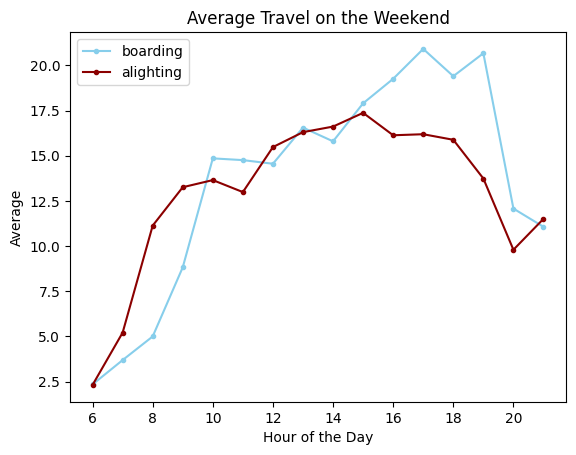

In [5]:
df_weekend = df[df["weekend"] == "weekend"]
df_week = df[df["weekend"] != "weekend"]

df_weekend.groupby("hour_of_day")["boarding"].agg("mean").plot(kind = "line", color = "skyblue", marker = ".")
df_weekend.groupby("hour_of_day")["alighting"].agg("mean").plot(kind = "line", color = "darkred", marker = ".")
plt.legend()
plt.xlabel("Hour of the Day")
plt.ylabel("Average")
plt.title("Average Travel on the Weekend")

Text(0.5, 1.0, 'Average Travel During Weekdays')

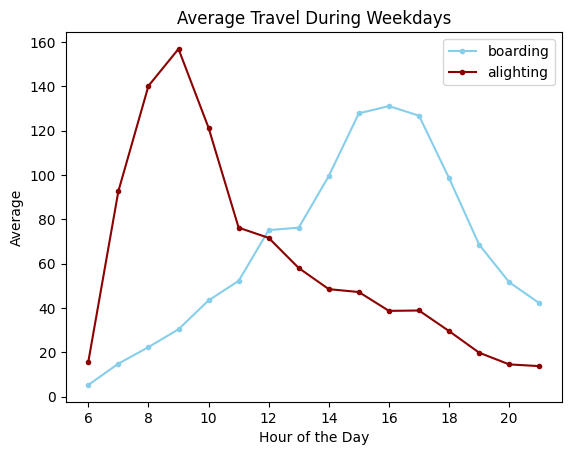

In [17]:
df_week.groupby("hour_of_day")["boarding"].agg("mean").plot(kind = "line", color = "skyblue", marker = ".")
df_week.groupby("hour_of_day")["alighting"].agg("mean").plot(kind = "line", color = "darkred", marker = ".")
plt.legend()
plt.xlabel("Hour of the Day")
plt.ylabel("Average")
plt.title("Average Travel During Weekdays")

Text(0.5, 1.0, 'Average Travelling Day of the Week')

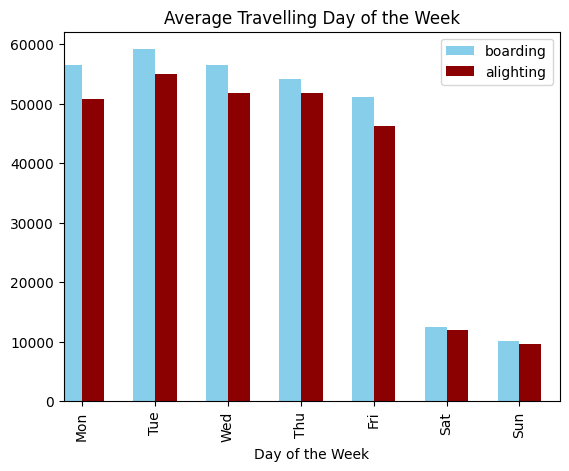

In [16]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig, ax = plt.subplots()
df.groupby("day_of_week")["boarding"].agg("sum").reindex(day_order).plot(ax=ax, kind = "bar", color = "skyblue", position = 1, width = 0.3)
df.groupby("day_of_week")["alighting"].agg("sum").reindex(day_order).plot(ax=ax, kind = "bar", color = "darkred", position = 0, width = 0.3)
plt.legend()
plt.xlabel("Day of the Week")
plt.title("Average Travelling Day of the Week")

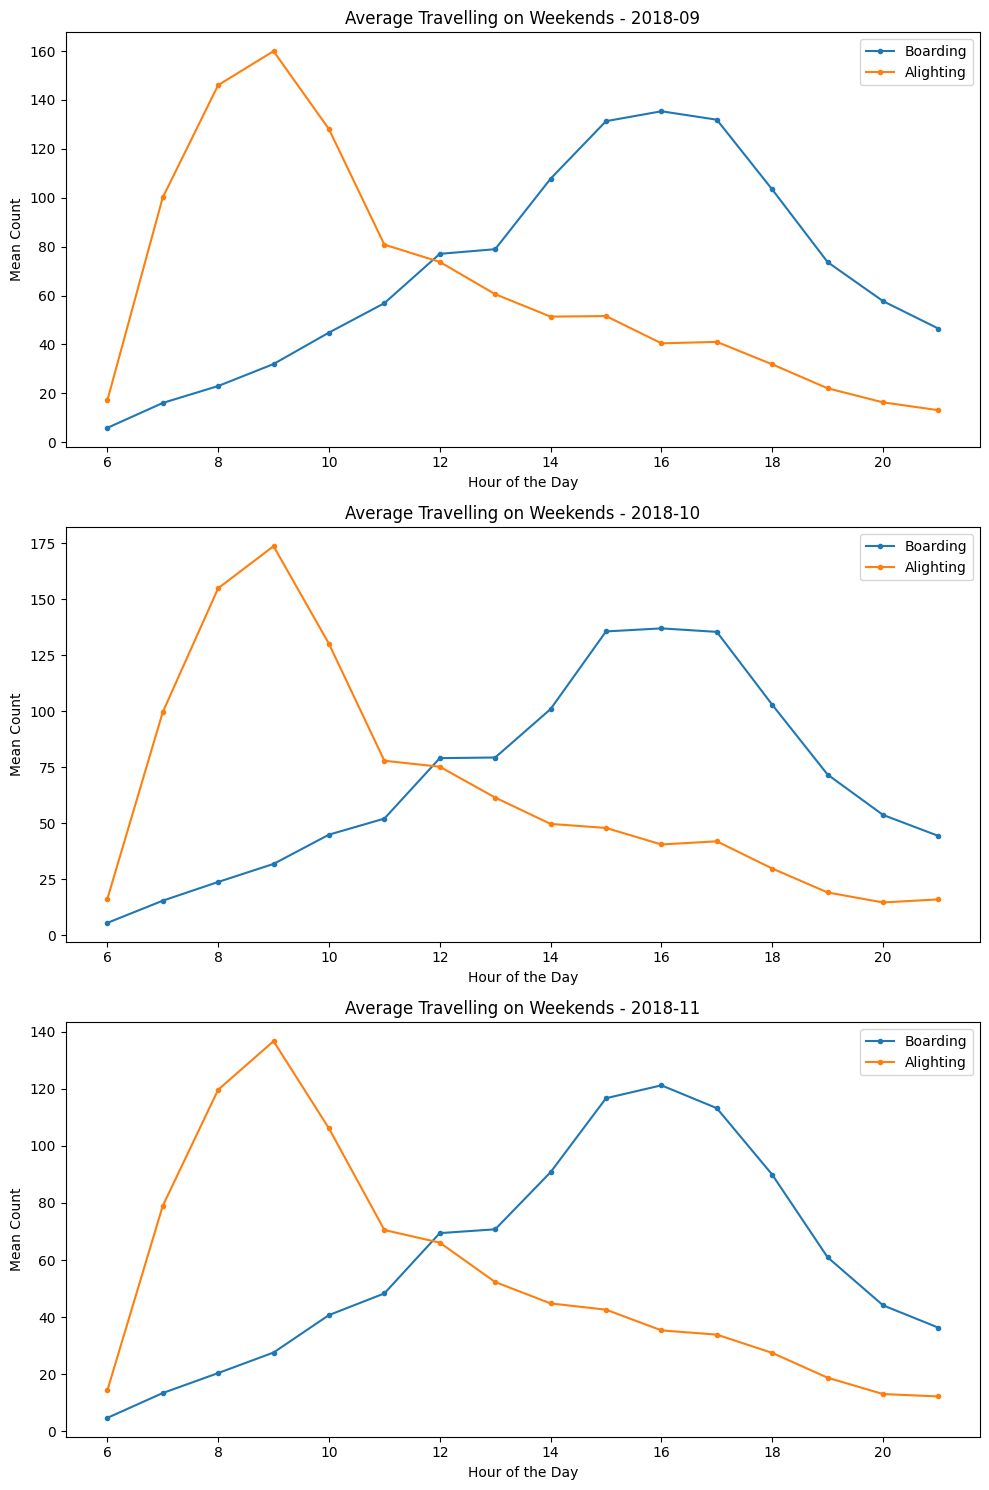

In [26]:
#Did Weather Impact Travel During the Weekend?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols=1, figsize= (10,15))

for month, ax in zip(['2018-09', '2018-10', '2018-11'], [ax1, ax2, ax3]):
    mask = (df["Year-Month"] == month) & (df["weekend"] == "weekday")
    d = df[mask]
    
    d.groupby(["hour_of_day"])["boarding"].agg("mean").plot(ax=ax, kind="line", marker=".", label="Boarding")
    d.groupby(["hour_of_day"])["alighting"].agg("mean").plot(ax=ax, kind="line", marker=".", label="Alighting")
    
    ax.set_title(f"Average Travelling During the Weekday - {month}")
    ax.set_xlabel("Hour of the Day")
    ax.set_ylabel("Average # of Passengers")
    ax.legend()

plt.tight_layout()
plt.show()